## How are in-demand skills trending for Data Analysts?

### Methodology

1. Aggregate skill counts monthly
2. Re-analyse based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pedro\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_PT = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Portugal')].copy()

In [3]:
df_DA_PT['job_posted_month_no'] = df_DA_PT['job_posted_date'].dt.month

In [4]:
df_DA_PT_explode = df_DA_PT.explode('job_skills')

In [11]:
df_DA_PT_pivot = df_DA_PT_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_PT_pivot.loc['Total'] = df_DA_PT_pivot.sum()

df_DA_PT_pivot = df_DA_PT_pivot[df_DA_PT_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_PT_pivot = df_DA_PT_pivot.drop('Total')

df_DA_PT_pivot

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,sql server,...,atlassian,neo4j,planner,react,powershell,jupyter,outlook,vue,windows,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,58,39,27,33,32,14,14,12,4,5,...,0,0,0,0,0,0,0,0,0,0
2,34,20,13,18,15,7,10,4,1,5,...,0,0,0,0,0,0,0,0,0,0
3,30,24,15,11,19,3,8,7,2,4,...,0,0,0,0,0,0,0,0,0,0
4,46,23,25,19,31,11,4,5,3,5,...,0,0,0,0,0,0,0,0,1,0
5,58,39,17,23,21,15,4,2,2,12,...,0,0,1,0,0,0,1,1,0,0
6,82,54,44,40,42,20,22,7,16,6,...,0,0,0,0,1,0,0,0,0,0
7,91,63,39,41,31,21,4,9,4,6,...,1,0,0,1,0,1,0,0,0,1
8,87,51,38,35,36,21,14,2,10,5,...,0,0,0,0,0,0,0,0,0,0
9,54,41,30,22,25,10,6,4,2,2,...,0,0,0,0,0,0,0,0,0,0


In [15]:
DA_totals = df_DA_PT.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1      98
2      60
3      61
4      77
5      76
6     130
7     113
8     161
9     150
10     87
11     94
12     75
dtype: int64

In [20]:
df_DA_PT_percent = df_DA_PT_pivot.div(DA_totals/100, axis=0)

df_DA_PT_percent

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,sql server,...,atlassian,neo4j,planner,react,powershell,jupyter,outlook,vue,windows,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,59.183673,39.795918,27.551020,33.673469,32.653061,14.285714,14.285714,12.244898,4.081633,5.102041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,56.666667,33.333333,21.666667,30.000000,25.000000,11.666667,16.666667,6.666667,1.666667,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,49.180328,39.344262,24.590164,18.032787,31.147541,4.918033,13.114754,11.475410,3.278689,6.557377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,59.740260,29.870130,32.467532,24.675325,40.259740,14.285714,5.194805,6.493506,3.896104,6.493506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.298701,0.000000
5,76.315789,51.315789,22.368421,30.263158,27.631579,19.736842,5.263158,2.631579,2.631579,15.789474,...,0.000000,0.000000,1.315789,0.000000,0.000000,0.000000,1.315789,1.315789,0.000000,0.000000
6,63.076923,41.538462,33.846154,30.769231,32.307692,15.384615,16.923077,5.384615,12.307692,4.615385,...,0.000000,0.000000,0.000000,0.000000,0.769231,0.000000,0.000000,0.000000,0.000000,0.000000
7,80.530973,55.752212,34.513274,36.283186,27.433628,18.584071,3.539823,7.964602,3.539823,5.309735,...,0.884956,0.000000,0.000000,0.884956,0.000000,0.884956,0.000000,0.000000,0.000000,0.884956
8,54.037267,31.677019,23.602484,21.739130,22.360248,13.043478,8.695652,1.242236,6.211180,3.105590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,36.000000,27.333333,20.000000,14.666667,16.666667,6.666667,4.000000,2.666667,1.333333,1.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
#Change month number to name
df_DA_PT_percent = df_DA_PT_percent.reset_index()
df_DA_PT_percent['job_posted_month'] = df_DA_PT_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_PT_percent = df_DA_PT_percent.set_index('job_posted_month')
df_DA_PT_percent = df_DA_PT_percent.drop(columns='job_posted_month_no')

df_DA_PT_percent

job_skills,sql,python,power bi,tableau,excel,r,sas,azure,looker,sql server,...,atlassian,neo4j,planner,react,powershell,jupyter,outlook,vue,windows,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,59.183673,39.795918,27.551020,33.673469,32.653061,14.285714,14.285714,12.244898,4.081633,5.102041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,56.666667,33.333333,21.666667,30.000000,25.000000,11.666667,16.666667,6.666667,1.666667,8.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,49.180328,39.344262,24.590164,18.032787,31.147541,4.918033,13.114754,11.475410,3.278689,6.557377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,59.740260,29.870130,32.467532,24.675325,40.259740,14.285714,5.194805,6.493506,3.896104,6.493506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.298701,0.000000
May,76.315789,51.315789,22.368421,30.263158,27.631579,19.736842,5.263158,2.631579,2.631579,15.789474,...,0.000000,0.000000,1.315789,0.000000,0.000000,0.000000,1.315789,1.315789,0.000000,0.000000
Jun,63.076923,41.538462,33.846154,30.769231,32.307692,15.384615,16.923077,5.384615,12.307692,4.615385,...,0.000000,0.000000,0.000000,0.000000,0.769231,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,80.530973,55.752212,34.513274,36.283186,27.433628,18.584071,3.539823,7.964602,3.539823,5.309735,...,0.884956,0.000000,0.000000,0.884956,0.000000,0.884956,0.000000,0.000000,0.000000,0.884956
Aug,54.037267,31.677019,23.602484,21.739130,22.360248,13.043478,8.695652,1.242236,6.211180,3.105590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,36.000000,27.333333,20.000000,14.666667,16.666667,6.666667,4.000000,2.666667,1.333333,1.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


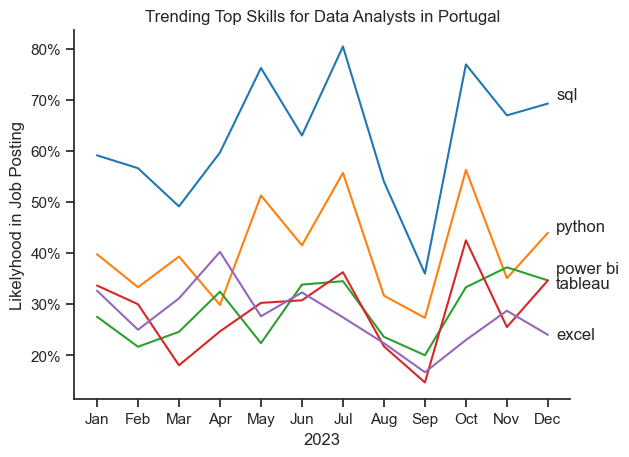

In [37]:
df_plot = df_DA_PT_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Portugal')
plt.ylabel('Likelyhood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


offsets = [0.8, 0.4, 1.5, -1.5, -0.8]  # Adjust manually as needed

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i] + offsets[i], df_plot.columns[i])

plt.show()